In [51]:
#Georgia Sugisandhea_535230080
#Memanggil library library yang akan dipakai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import folium

In [52]:
#Membaca file excel yang akan digunakan pada sheet1 dan memasukkannya ke variable ispu
ispu = pd.read_excel("ISPU Jakarta.xlsx", sheet_name="Sheet1")

In [53]:
#Menampilkan 5 baris pertama pada tabel ispu
ispu.head()

,Tanggal,PM10,PM25,SO2,CO,O3,NO2
0,2018-01-01,76.0,NaN,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,NaN,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,NaN,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,NaN,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,NaN,32.0,26.0,28.0,10.0


In [54]:
#Menghitung persentase banyaknya baris yang berisi NaN dari masing masing kolom
ispu.isna().sum()/len(ispu)*100

Tanggal     0.000000
PM10        0.332226
PM25       59.911406
SO2         0.885936
CO          0.332226
O3          0.110742
NO2         0.276855
dtype: float64

In [55]:
#Menghapus kolom PM25 karena baris yang berisi NaN sebanyak 59%
#dan memasukkan hasilnya ke variable ispu2
ispu2 = ispu.drop(['PM25'], axis = 1)
#Menampilkan 5 baris pertama dari ispu2
ispu2.head()

,Tanggal,PM10,SO2,CO,O3,NO2
0,2018-01-01,76.0,31.0,38.0,35.0,9.0
1,2018-01-02,23.0,31.0,24.0,39.0,14.0
2,2018-01-03,53.0,35.0,35.0,101.0,23.0
3,2018-01-04,53.0,49.0,34.0,57.0,15.0
4,2018-01-05,44.0,32.0,26.0,28.0,10.0


In [56]:
#Mengisi baris baris yang isinya tidak ada menggunakan metode forward fill (ffill) dan backward fill*bfill
ispu2 = ispu2.ffill()
ispu2 = ispu2.bfill()

In [57]:
#Menghitung persentase banyaknya baris yang berisi NaN dari masing masing kolom
ispu2.isna().sum()/len(ispu2)*100
#dimana sudah 0 sekarang karena telah diisi dengan ffill dan bfill

Tanggal    0.0
PM10       0.0
SO2        0.0
CO         0.0
O3         0.0
NO2        0.0
dtype: float64

In [58]:
#Membuat kolom kolom baru dimana memecah data dari kolom tanggal menjadi lebih terperinci
#yaitu Tahun, Bulan, dan juga Hari
ispu2['Tahun'] = pd.DatetimeIndex(ispu2['Tanggal']).year
ispu2['Bulan'] = pd.DatetimeIndex(ispu2['Tanggal']).month
ispu2['Hari'] = ispu2['Tanggal'].dt.day_name()

#Menampilkan 5 baris pertama dari ispu2
ispu2.head()


,Tanggal,PM10,SO2,CO,O3,NO2,Tahun,Bulan,Hari
0,2018-01-01,76.0,31.0,38.0,35.0,9.0,2018,1,Monday
1,2018-01-02,23.0,31.0,24.0,39.0,14.0,2018,1,Tuesday
2,2018-01-03,53.0,35.0,35.0,101.0,23.0,2018,1,Wednesday
3,2018-01-04,53.0,49.0,34.0,57.0,15.0,2018,1,Thursday
4,2018-01-05,44.0,32.0,26.0,28.0,10.0,2018,1,Friday


In [59]:
#Memasukkan tabel original (ispu) ke variable baru, ispu4
ispu4 = ispu
#Menghapus baris baris yang berisi missing values
ispu4 = ispu.dropna()
#Membuat kolom kolom baru dimana memecah data dari kolom tanggal menjadi lebih terperinci
#yaitu Tahun, Bulan, dan juga Hari
ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
ispu4['Hari'] = ispu4['Tanggal'].dt.day_name()
#Menampilkan 5 baris pertama dari ispu4
ispu4.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\744976716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Tahun'] = pd.DatetimeIndex(ispu4['Tanggal']).year
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\744976716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ispu4['Bulan'] = pd.DatetimeIndex(ispu4['Tanggal']).month
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\744976716.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Tanggal,PM10,PM25,SO2,CO,O3,NO2,Tahun,Bulan,Hari
1076,2021-01-01,38.0,53.0,29.0,6.0,31.0,13.0,2021,1,Friday
1077,2021-01-02,27.0,46.0,27.0,7.0,47.0,7.0,2021,1,Saturday
1078,2021-01-03,44.0,58.0,25.0,7.0,40.0,13.0,2021,1,Sunday
1079,2021-01-04,30.0,48.0,24.0,4.0,32.0,7.0,2021,1,Monday
1080,2021-01-05,38.0,53.0,24.0,6.0,31.0,9.0,2021,1,Tuesday


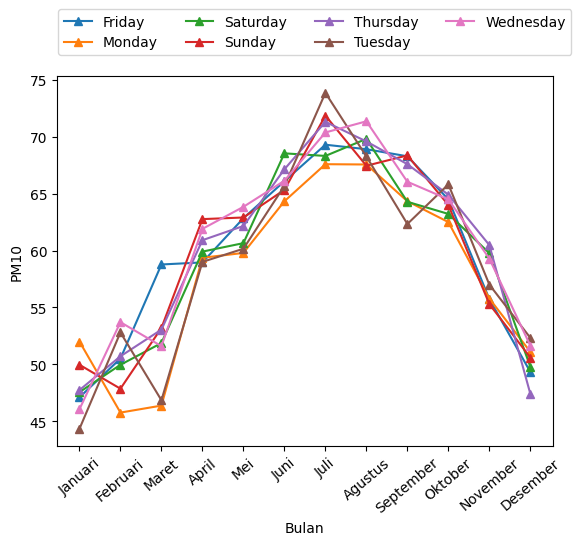

In [60]:
#Membuat grafik garis untuk kolom PM10 yang menunjukkan rata rata tingkatnya pada masing masing bulan dan hari
var = 'PM10'
r = ispu2.groupby(['Bulan', 'Hari']).mean()[var]
r.unstack().plot(marker = '^')
plt.ylabel(var)
#Mengganti label x dari angka menjadi nama nama bulan
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=40)
#Memposisikan legend grafik di atas tengah, dan pengaturan detail dari legendnya
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=4)

Text(0.5, 1.0, 'Perbandingan Nilai Rata-rata Polutan PM10Tahun 2018 - 2023')

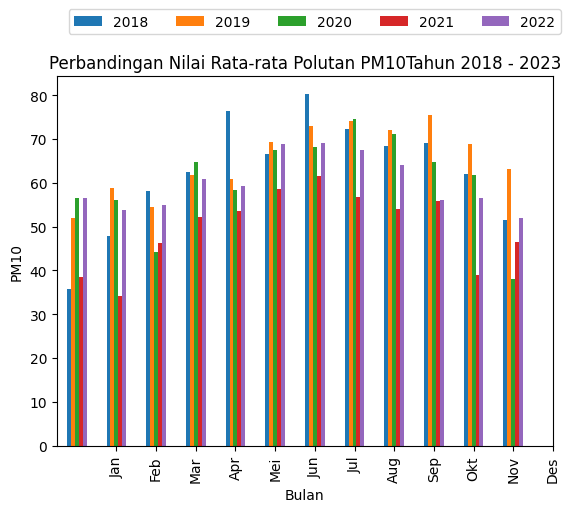

In [61]:
#Membuat grafik batang untuk kolom PM10 yang menunjukkan rata rata tingkatnya pada masing masing tahun dan bulan
var = 'PM10'
r = ispu2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot.bar()
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Perbandingan Nilai Rata-rata Polutan ' + var + 'Tahun 2018 - 2023')

Text(0.5, 1.0, 'Perbandingan Nilai Rata-rata Polutan PM10Tahun 2018 - 2023')

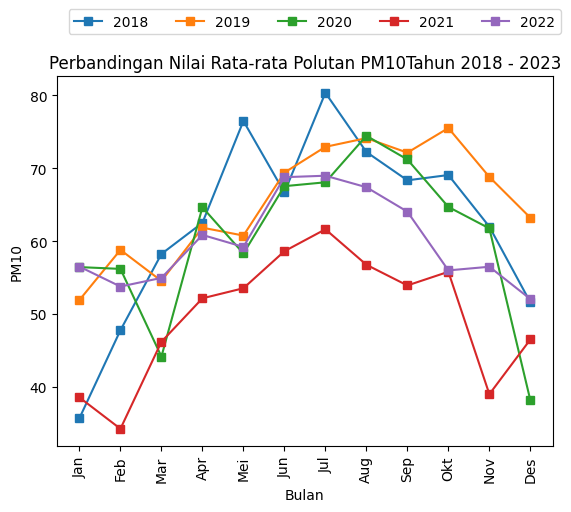

In [62]:
#Membuat grafik garis untuk kolom PM10 yang menunjukkan rata rata tingkatnya pada masing masing tahun dan bulan
var = 'PM10'
r = ispu2.groupby(['Bulan', 'Tahun'])[var].mean()
r.unstack().plot(marker='s')
plt.ylabel(var)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=5)
plt.title('Perbandingan Nilai Rata-rata Polutan ' + var + 'Tahun 2018 - 2023')

In [63]:
#Membuat fungsi untuk membuat kolom baru dan memasukkan nilai kategori kesehatan udara tanggal tersebut berdasarkan nilai nilai yang ada di tabel terebut
def kategori(df):
    row = df.shape[0]
    df['Kategori'] = ''
    for i in range(0, row):
        #Ketika semua kolom (PM10, SO2, O3, NO2) ada dibawah 50, maka kategori diisi Sehat
        if((df.loc[i]['PM10']<=50) & (df.loc[i]['SO2']<=50) & (df.loc[i]['O3']<=50) & (df.loc[i]['NO2']<=50)):
            df.loc[i, 'Kategori'] = 'Sehat'
        #Ketika salah satu kolom berada diatas 50 tapi dibawah 100, maka kategori diisi Sedang
        elif((df.loc[i]['PM10']<=100) | (df.loc[i]['SO2']<=100) | (df.loc[i]['O3']<=100) & (df.loc[i]['NO2']<=100)):
            df.loc[i, 'Kategori'] = 'Sedang'
        #Ketika salah satu kolom berada diatas 100 tapi dibawah 200, maka kategori diisi Tidak Sehat
        elif((df.loc[i]['PM10']<=200) | (df.loc[i]['SO2']<=200) | (df.loc[i]['O3']<=200) & (df.loc[i]['NO2']<=200)):
            df.loc[i, 'Kategori'] = 'Tidak Sehat'
        #Ketika salah satu kolom berada diatas 200 tapi dibawah 300, maka kategori diisi Sangat Tidak Sehat
        elif((df.loc[i]['PM10']<=300) | (df.loc[i]['SO2']<=300) | (df.loc[i]['O3']<=300) & (df.loc[i]['NO2']<=300)):
            df.loc[i, 'Kategori'] = 'Sangat Tidak Sehat'
        #Ketika tidak memenuhi semua kondisi diatas, berarti semua nilai diatas 300, maka kategori diisi dengan Berbahaya
        else:
            df.loc[i, 'Kategori'] = 'Berbahaya'
    #Mengembalikan hasil tabel yang dibuat 
    return df

In [64]:
#Membuat kolom baru kategori beserta nilainya pada ispu2 menggunakan fungsi kategori dan memasukkannya ke variable new_data
new_data = kategori(ispu2)
#Menampilkan 5 baris terakhir dari new_data
new_data.tail()

,Tanggal,PM10,SO2,CO,O3,NO2,Tahun,Bulan,Hari,Kategori
1801,2022-12-27,36.0,58.0,42.0,20.0,18.0,2022,12,Tuesday,Sedang
1802,2022-12-28,46.0,57.0,41.0,15.0,19.0,2022,12,Wednesday,Sedang
1803,2022-12-29,23.0,57.0,12.0,16.0,15.0,2022,12,Thursday,Sedang
1804,2022-12-30,40.0,57.0,21.0,17.0,24.0,2022,12,Friday,Sedang
1805,2022-12-31,54.0,56.0,24.0,23.0,24.0,2022,12,Saturday,Sedang


Text(0.5, 1.0, 'Jumlah Hari Sesuai Kategori Kualitas Udara')

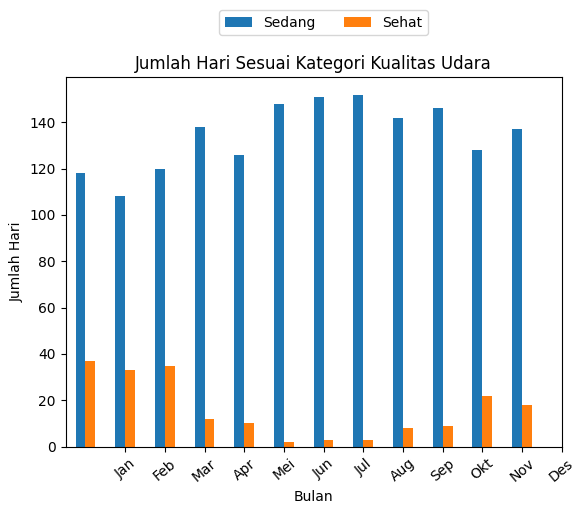

In [65]:
#Membuat grafik batang untuk tingkat banyak masing masing nilai kategori pada masing masing bulan untuk tabel new_data
r = new_data.groupby(['Bulan', 'Kategori']).count()['Tanggal']
r.unstack().plot.bar()
#Menamakan sumbu y sebagai Jumlah Hari
plt.ylabel('Jumlah Hari')
#Mengganti label x dari angka menjadi nama nama bulan
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Des'], rotation=40)
#Memposisikan legend grafik di atas tengah
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=4)
#Menamakan grafik ini dengan judul dibawah ini
plt.title('Jumlah Hari Sesuai Kategori Kualitas Udara')

Text(0.5, 1.0, 'Jumlah Hari Sesuai Kategori Kualitas Udara')

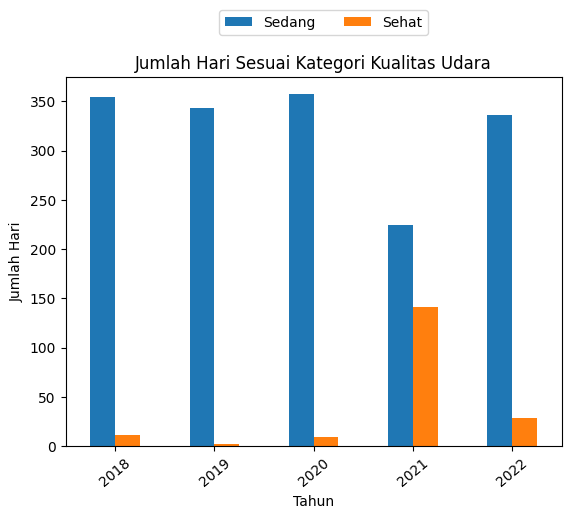

In [66]:
#Membuat grafik batang untuk tingkat banyak masing masing nilai kategori pada masing masing tahun untuk tabel new_data
r = new_data.groupby(['Tahun', 'Kategori']).count()['Tanggal']
r.unstack().plot.bar()
plt.ylabel('Jumlah Hari')
plt.xticks(rotation=40)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=4)
plt.title('Jumlah Hari Sesuai Kategori Kualitas Udara')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\1161766234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Tahun', y=var, palette='RdYlGn')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


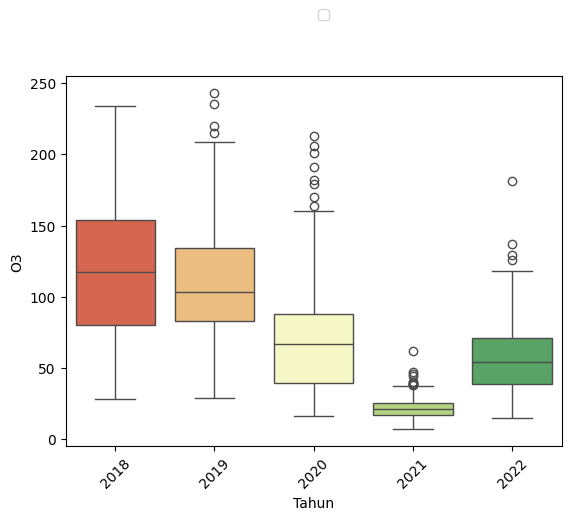

In [67]:
#Membuat grafik boxplot untuk sebaran tingkat O3 di masing masing tahun, menggunakan palette RdYlGn
var = 'O3'
sns.boxplot(data=ispu2, x='Tahun', y=var, palette='RdYlGn')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=3)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\1197170048.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Bulan', y=var, palette="RdYlGn")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


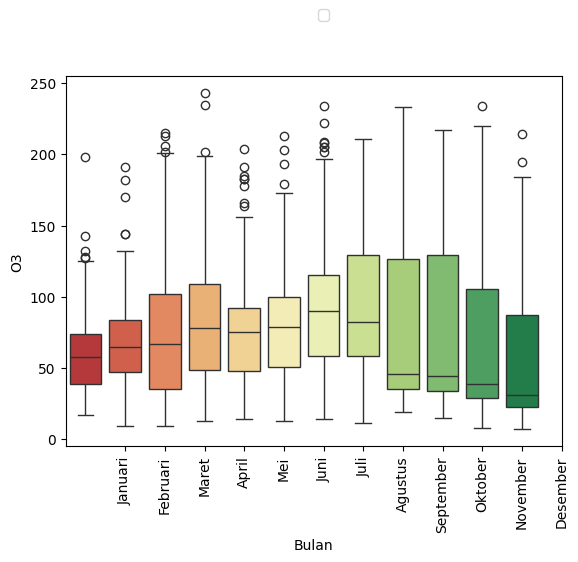

In [68]:
#Membuat grafik boxplot untuk sebaran tingkat O3 di masing masing bulan, menggunakan palette RdYlGn
sns.boxplot(data=ispu2, x='Bulan', y=var, palette="RdYlGn")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], rotation=90)
plt.legend(loc='upper center', bbox_to_anchor=(0.52, 1.2), ncol=3)

In [69]:
#Menghapus kolom tanggal, tahun, bulan, hari, dan kategori dari tabel ispu2 dan memasukkannya ke variable ispu3
ispu3 = ispu2.drop(['Tanggal', 'Tahun', 'Bulan', 'Hari', 'Kategori'], axis=1)
ispu3.head()

,PM10,SO2,CO,O3,NO2
0,76.0,31.0,38.0,35.0,9.0
1,23.0,31.0,24.0,39.0,14.0
2,53.0,35.0,35.0,101.0,23.0
3,53.0,49.0,34.0,57.0,15.0
4,44.0,32.0,26.0,28.0,10.0


In [70]:
#Menghitung korelasi dari satu kolom ke semua kolom lain dan memasukkannya ke variable c
c = ispu3.corr()
#Menampilkan hasil perhitungan korelasinya
c

,PM10,SO2,CO,O3,NO2
PM10,1.000000,0.046229,0.261810,0.479959,0.201763
SO2,0.046229,1.000000,-0.133637,-0.213480,0.341069
CO,0.261810,-0.133637,1.000000,0.346942,-0.060208
O3,0.479959,-0.213480,0.346942,1.000000,-0.287379
NO2,0.201763,0.341069,-0.060208,-0.287379,1.000000


In [71]:
#Membuat array berisi nama nama warna untuk digunakan nanti dalam scatterplot
colors = ['blue', 'darkblue', 'lightblue', 'deepskyblue', 'red', 'green', 'purple',
'orange', 'darkred', 'chocolate', 'gold', 'darkgreen', 'cadetblue', 'darkviolet', 'pink', 
'lightgreen', 'teal', 'mediumpurple', 'springgreen', 'lightcoral', 'olivedrab', 'olive', 
'turquoise', 'lightseagreen', 'magenta', 'khaki', 'springgreen', 'hotpink', 'black']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\1730313629.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho = c.iloc[x][y]


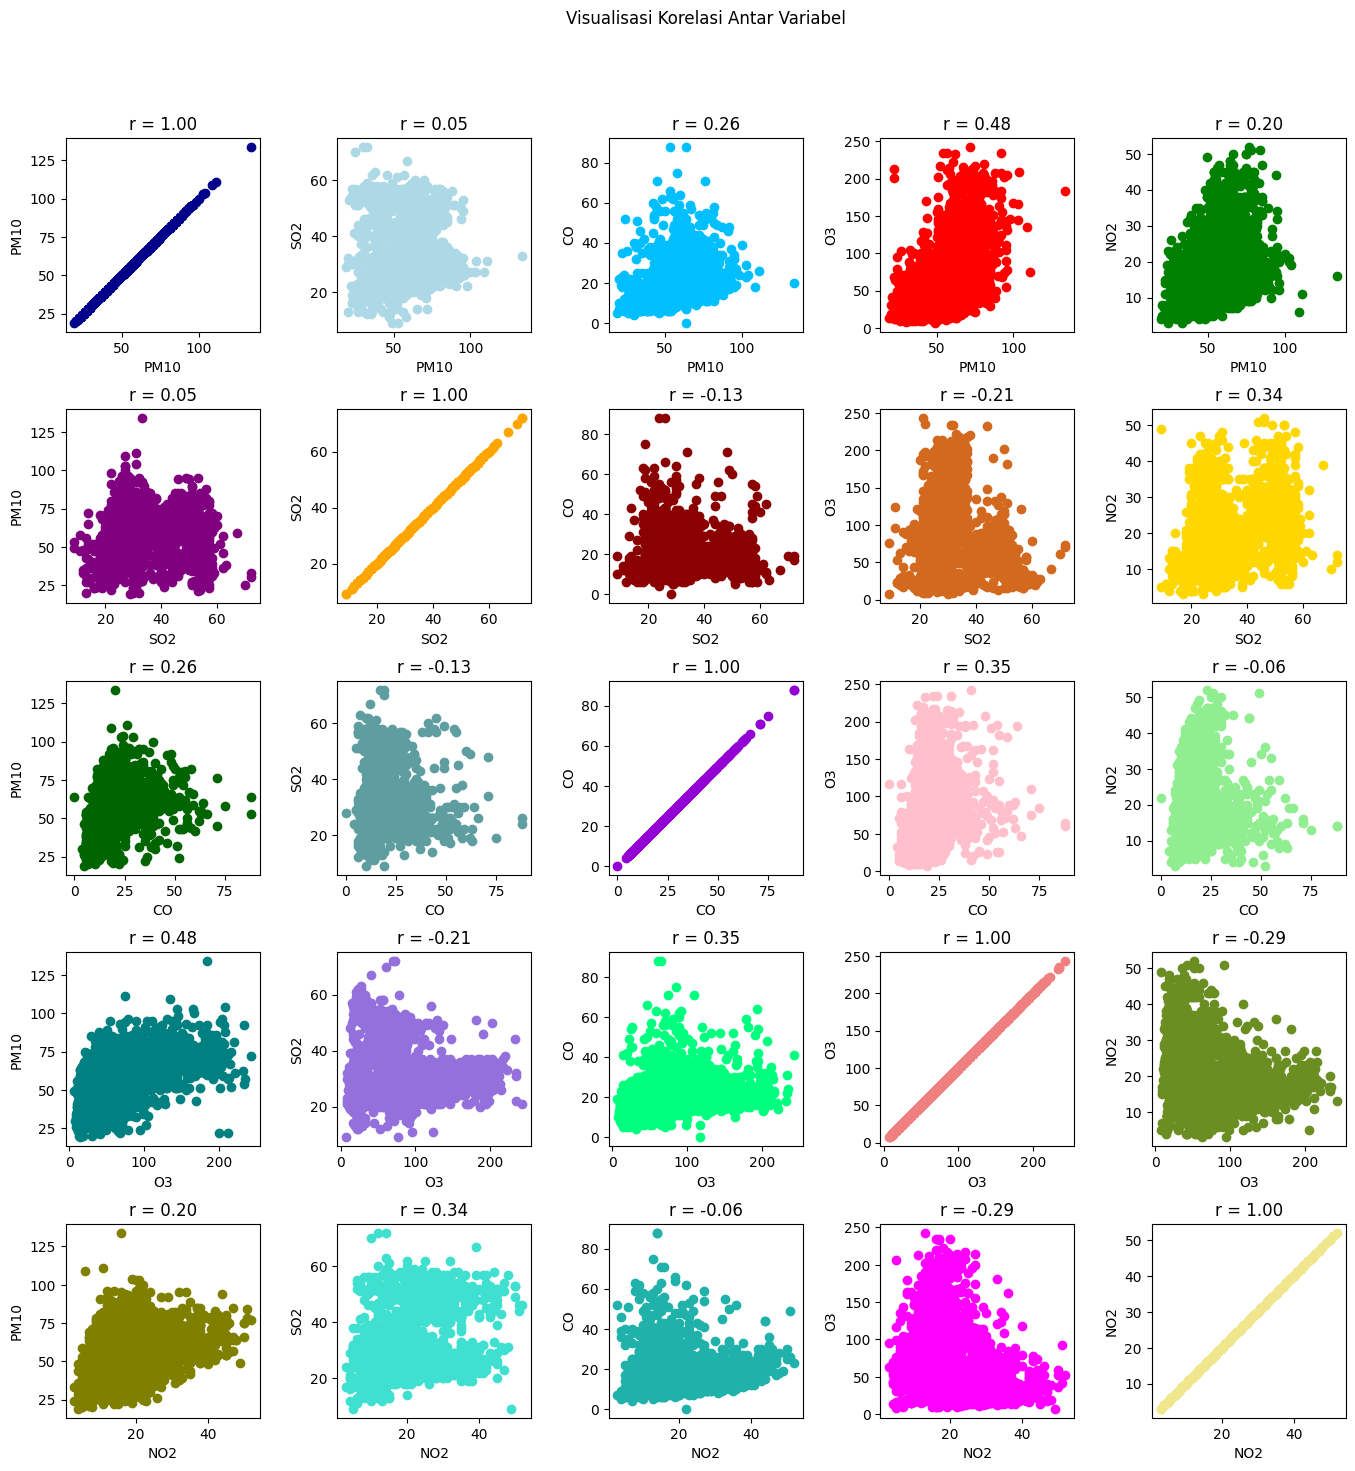

In [72]:
#Membuat subplots berisi scatter plot dari masing masing korelasi antar kolom yang ada di variable c
#Membuat template subplot 5x5
fig = plt.subplots(5,5,figsize=(16,16))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
col = c.columns
k = 1
x = 0
#Mengisi masing masing kotak dengan nilai korelasi antar kolom bersama dengan warna yang berbeda yang diambil dari array colors yang sudah dibuat
#Menge-set label x dan y dan juga title dari masing masing subplot
#Melalui loop
for i in col:
    y=0
    for j in col:
        plt.subplot(5,5,k)
        plt.scatter(ispu[i], ispu[j], color = colors[k])
        rho = c.iloc[x][y]
        plt.title('r = ' + f'{rho:.2f}')
        plt.xlabel(i)
        plt.ylabel(j)
        k = k+1
        y = y+1
    x=x+1
#Menge-set judul dari keseluruhan plot
plt.suptitle("Visualisasi Korelasi Antar Variabel")
#Menampilkan plot yang telah dibuat
plt.show()

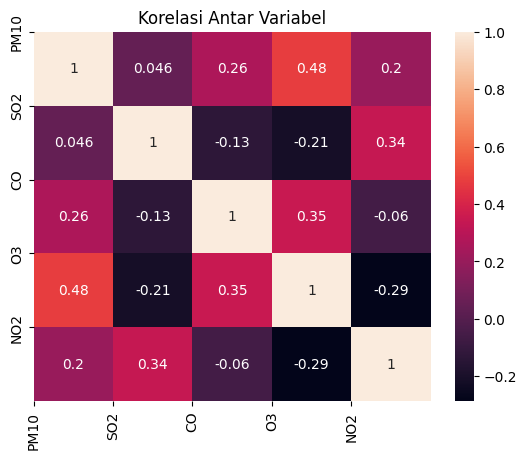

In [73]:
#membuat heatmap menggunakan seaborn dari data korelasi dari masing masing kolom yang telah dibuat dalam variable c
hm = sns.heatmap(data=c,annot=True)
#Menge-set judul dari grafik heatmap 
plt.title("Korelasi Antar Variabel")
#Membuat label x dan y dari heatmap sesuai dengan nama nama kolom
plt.xticks(range(len(c.columns)),c.columns, rotation=90)
plt.yticks(range(len(c.columns)), c.columns)
#Menampilkan heatmap yang telah dibuat
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\3772383502.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text = ax.text(j, i, '%.3f' %c.iloc[i][j], ha="center", va="center", color="b")


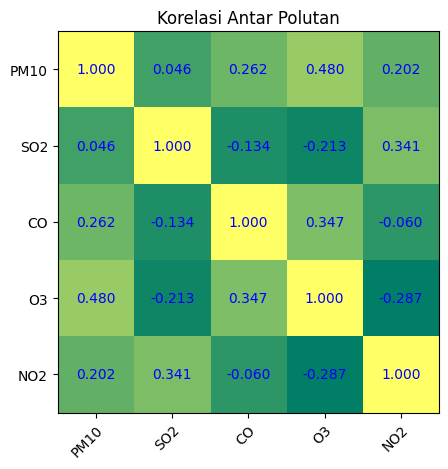

In [74]:
#cara lain dari membuat heatmap menggunakan matplotlib.pyplot
#Memulai pembuatan heatmap
fig, ax = plt.subplots()
im = ax.imshow(c, cmap = 'summer')

#Mengatur label x dan y pada heatmap sesuai dengan nama kolom yang berkorelasi
plt.xticks(range(len(c.columns)),c.columns, rotation=90)
plt.yticks(range(len(c.columns)), c.columns)

#Set property dari label x
#rotation = 45 untuk agar label x miring 45 derajat
#ha = right bahwa untuk align label x ke kanan
#rotation_mode="anchor" untuk agar ujung kanan dari label tertempel
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

#Menggunakan looping, mengisi masing masing value dari kolom heatmap dengan nilai yang ada di dalam variable c
for i in range(len(c)):
    for j in range(len(c)):
        text = ax.text(j, i, '%.3f' %c.iloc[i][j], ha="center", va="center", color="b")

#Menge-set judul dari keseluruhan grafik
ax.set_title("Korelasi Antar Polutan")
#Menge-set layout sebagai tight_layout
fig.tight_layout()
#Menampilkan hasil grafik yang dibuat
plt.show()

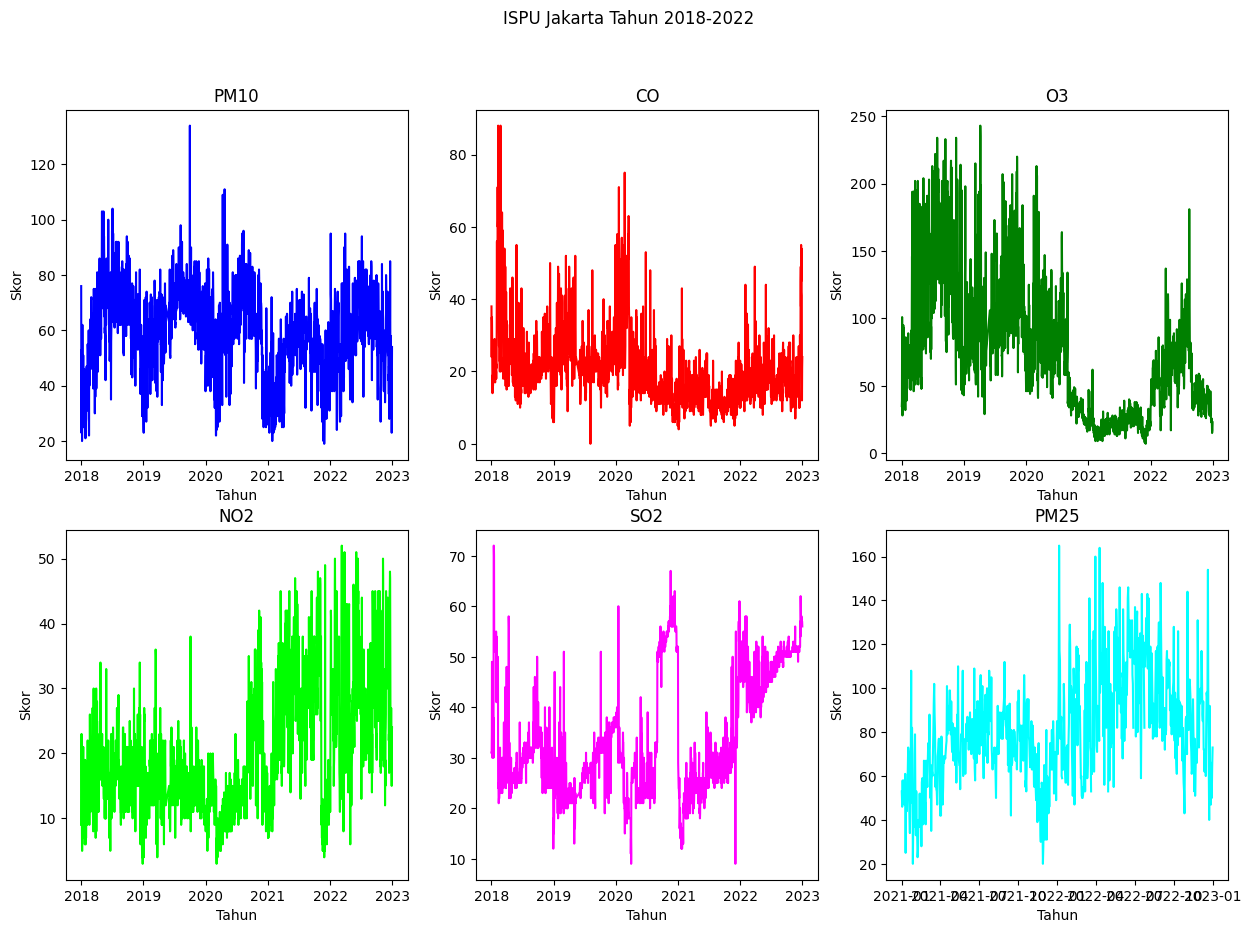

In [75]:
#Membuat subplot 3x2 untuk grafik garis untuk masing masing kolom pada tabel yang telah kita buat berdasarkan masing masing tanggal dalam tahun
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
plt.plot(ispu2['Tanggal'], ispu2['PM10'], color='blue')
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,2)
plt.plot(ispu2['Tanggal'], ispu2['CO'], color='red')
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,3)
plt.plot(ispu2['Tanggal'], ispu2['O3'], color='green')
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,4)
plt.plot(ispu2['Tanggal'], ispu2['NO2'], color='lime')
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,5)
plt.plot(ispu2['Tanggal'], ispu2['SO2'], color='magenta')
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,6)
plt.plot(ispu['Tanggal'], ispu['PM25'], color='aqua')
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Tahun')

#Menge-set judul dari keseluruhan grafik
plt.suptitle("ISPU Jakarta Tahun 2018-2022")

#Menampilkan hasil grafik yang telah kita buat
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\710428439.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Tahun', y='PM10', palette="RdYlGn")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\710428439.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Tahun', y='CO', palette="RdYlGn")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\710428439.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Tahun', y='O3', palette="RdYlGn")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\710428439.

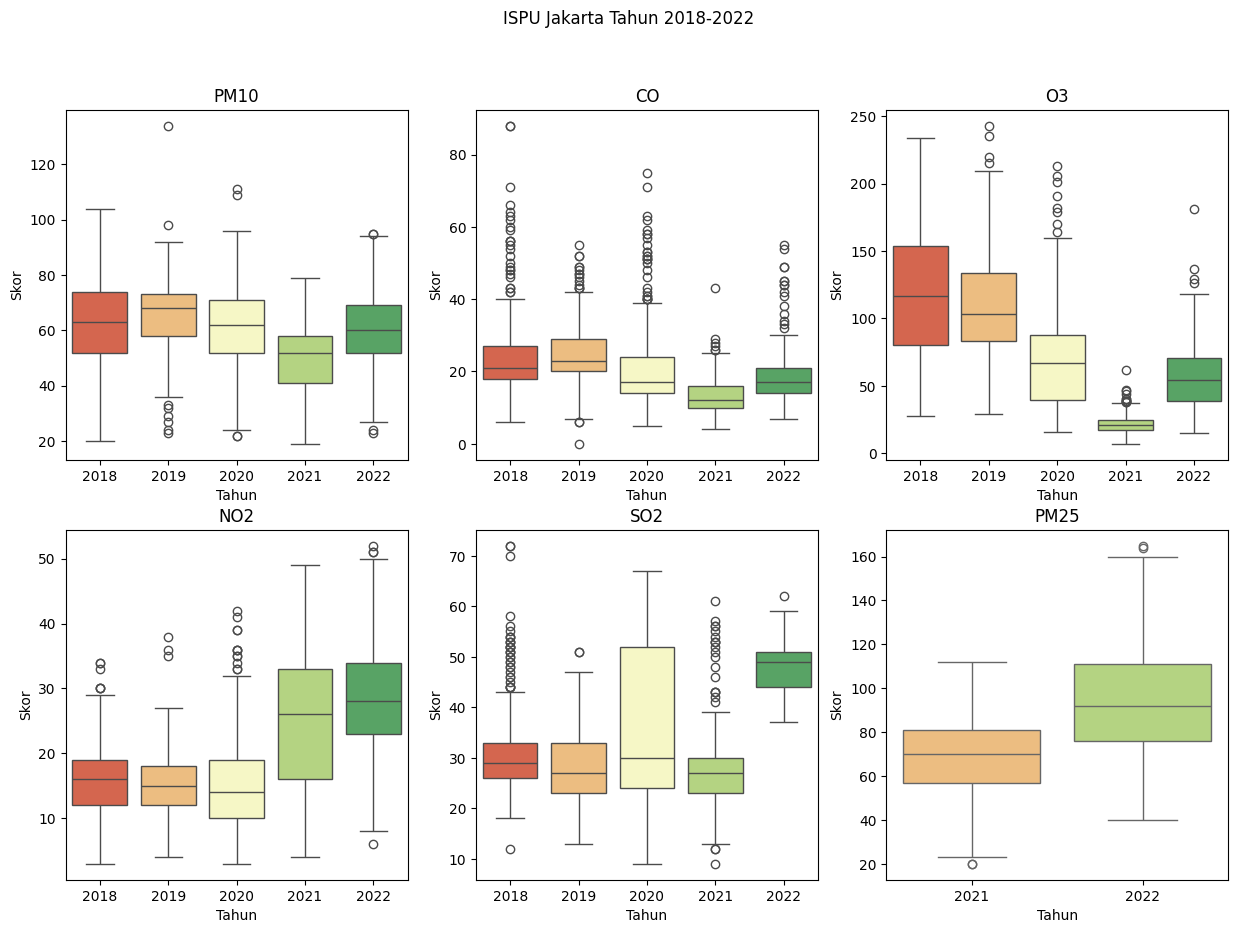

In [76]:
#Membuat subplot 3x2 untuk grafik garis untuk masing masing kolom pada tabel yang telah kita buat berdasarkan masing masing tanggal dalam tahun
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=ispu2, x='Tahun', y='PM10', palette="RdYlGn")
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,2)
sns.boxplot(data=ispu2, x='Tahun', y='CO', palette="RdYlGn")
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,3)
sns.boxplot(data=ispu2, x='Tahun', y='O3', palette="RdYlGn")
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,4)
sns.boxplot(data=ispu2, x='Tahun', y='NO2', palette="RdYlGn")
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,5)
sns.boxplot(data=ispu2, x='Tahun', y='SO2', palette="RdYlGn")
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Tahun')

plt.subplot(2,3,6)
sns.boxplot(data=ispu4, x='Tahun', y='PM25', palette="RdYlGn")
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Tahun')

#Menge-set judul dari keseluruhan grafik
plt.suptitle("ISPU Jakarta Tahun 2018-2022")

#Menampilkan hasil grafik yang telah kita buat
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\1391067679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Bulan', y='PM10', palette="RdYlGn")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\1391067679.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Bulan', y='CO', palette="RdYlGn")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\1391067679.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ispu2, x='Bulan', y='O3', palette="RdYlGn")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8184\1391067

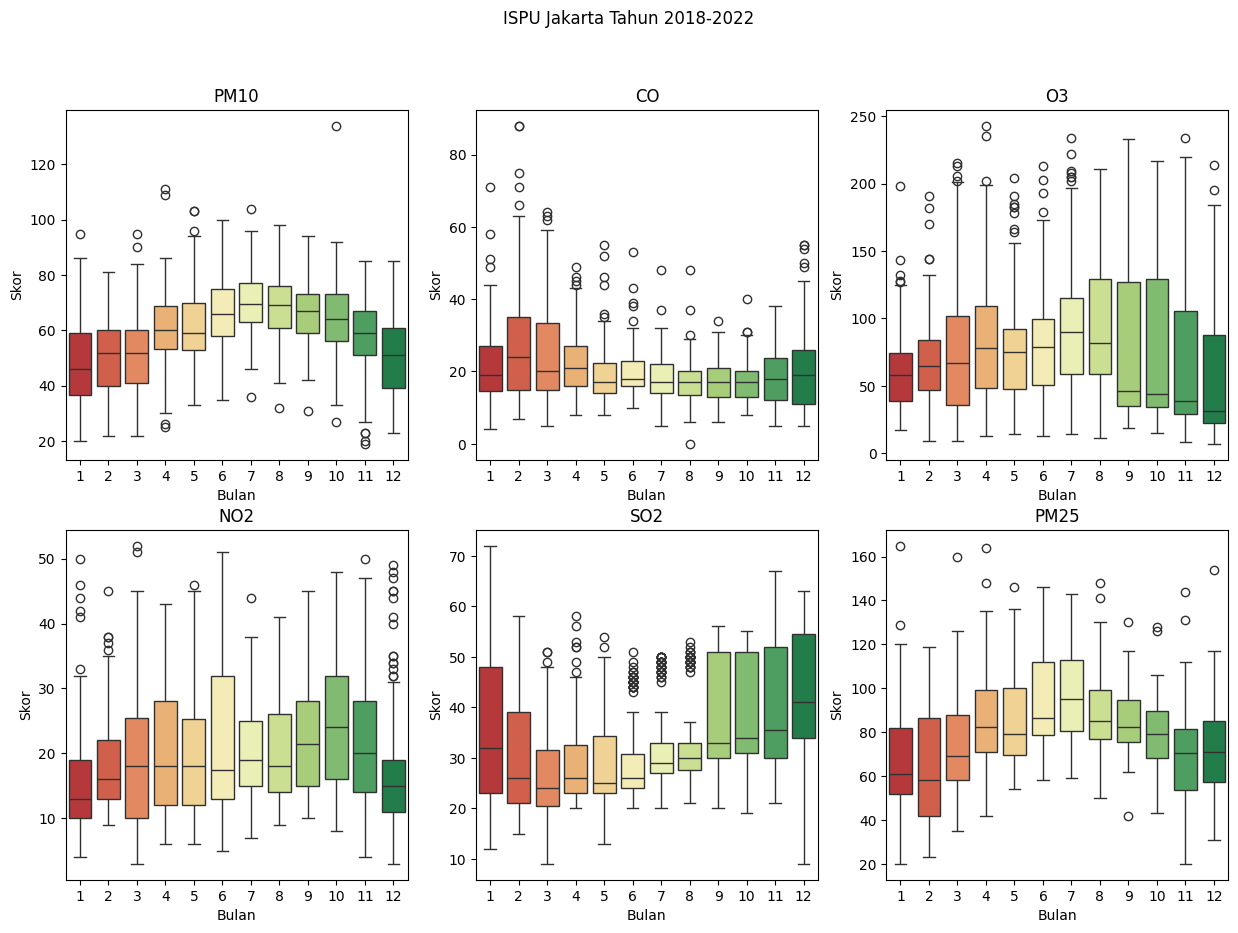

In [77]:
#Membuat subplot 3x2 untuk grafik garis untuk masing masing kolom pada tabel yang telah kita buat berdasarkan masing masing bulan
fig = plt.subplots(2,3,figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=ispu2, x='Bulan', y='PM10', palette="RdYlGn")
plt.title('PM10')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,2)
sns.boxplot(data=ispu2, x='Bulan', y='CO', palette="RdYlGn")
plt.title('CO')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,3)
sns.boxplot(data=ispu2, x='Bulan', y='O3', palette="RdYlGn")
plt.title('O3')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,4)
sns.boxplot(data=ispu2, x='Bulan', y='NO2', palette="RdYlGn")
plt.title('NO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,5)
sns.boxplot(data=ispu2, x='Bulan', y='SO2', palette="RdYlGn")
plt.title('SO2')
plt.ylabel('Skor')
plt.xlabel('Bulan')

plt.subplot(2,3,6)
sns.boxplot(data=ispu4, x='Bulan', y='PM25', palette="RdYlGn")
plt.title('PM25')
plt.ylabel('Skor')
plt.xlabel('Bulan')

#Menge-set judul dari keseluruhan grafik
plt.suptitle("ISPU Jakarta Tahun 2018-2022")

#Menampilkan hasil grafik yang telah kita buat
plt.show()